In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression   
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.impute import SimpleImputer, KNNImputer
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

df = pd.read_csv('dataset/convert_number_data_16.csv')


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27400 entries, 0 to 27399
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accelerationTime         27400 non-null  float64
 1   bodyType                 27400 non-null  int64  
 2   brand                    27400 non-null  int64  
 3   cargoVolume              27400 non-null  float64
 4   curbWeight               27400 non-null  float64
 5   driveWheelConfiguration  27400 non-null  int64  
 6   eLabel                   27400 non-null  int64  
 7   emissionsCO2             27400 non-null  float64
 8   engineCapacity           27400 non-null  float64
 9   fuelCapacity             27400 non-null  float64
 10  fuelConsumption          27400 non-null  float64
 11  height                   27400 non-null  float64
 12  length                   27400 non-null  float64
 13  model                    27400 non-null  int64  
 14  modelDate             

In [5]:
# df = df.drop(['curbWeight', 'vEengineDisplacement'], axis=1)
df['vEengineDisplacement'].value_counts()

vEengineDisplacement
1598.0    2141
1998.0    1387
1968.0    1212
1995.0    1123
1984.0     873
          ... 
2464.0       1
1372.0       1
796.0        1
2765.0       1
3997.0       1
Name: count, Length: 377, dtype: int64

In [6]:
df.isna().sum()

accelerationTime           0
bodyType                   0
brand                      0
cargoVolume                0
curbWeight                 0
driveWheelConfiguration    0
eLabel                     0
emissionsCO2               0
engineCapacity             0
fuelCapacity               0
fuelConsumption            0
height                     0
length                     0
model                      0
modelDate                  0
numberOfDoors              0
numberOfForwardGears       0
payload                    0
price                      0
roofLoad                   0
seatingCapacity            0
speed                      0
torque                     0
vEengineDisplacement       0
vEenginePower              0
vehicleTransmission        0
weightTotal                0
wheelbase                  0
width                      0
dtype: int64

In [7]:
# creating X and y variables
X = df.drop('price', axis=1)
# price column
y = np.log(df['price'])
# y = df['price']

In [8]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [9]:
# feature scale the X_train and X_test values

norm = StandardScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing data
X_test = norm.transform(X_test)

print(X_train)
print('\n')
print(X_test)

[[ 0.9216784  -1.61252279 -0.61955731 ... -1.6136943  -1.45023017
  -2.10946455]
 [-2.11295554  0.7800828   0.15508209 ...  0.91412979  0.50455617
   0.12733314]
 [-2.30027863 -2.63792518  0.15508209 ...  0.92944993  0.96414544
   0.33573044]
 ...
 [-1.25126936 -0.41621999  0.15508209 ...  0.57708658  0.96414544
   0.33573044]
 [-0.95155243 -2.46702479 -1.53504025 ...  0.02556132  0.49842831
   0.83588396]
 [-0.01493701  0.9509832   1.35225208 ...  1.0520111   0.81094901
   1.04428126]]


[[ 0.54703223 -0.41621999  0.15508209 ...  0.05620161  0.19816333
  -0.80350813]
 [ 1.03407225  0.6091824  -0.26744849 ...  0.80688877  0.41263832
   0.26626467]
 [-0.35211856  0.9509832  -0.12660497 ...  1.57289607 -0.01018381
   1.51664847]
 ...
 [ 0.2473153  -1.61252279 -1.46461848 ... -0.54128408  0.25944189
  -0.48396561]
 [ 0.54703223  1.1218836  -0.12660497 ...  1.6188565  -0.1388688
   1.72504577]
 [ 0.50956762  0.6091824   0.36634738 ... -0.44936321 -0.90485091
  -0.38671353]]


In [12]:
# Fitting linear regression
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [13]:
# fitting knn
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [14]:
# Fitting extra trees regressor

etr = ExtraTreesRegressor(random_state = 123 , max_depth = 45  , n_estimators = 400)
etr.fit(X_train,y_train)

ExtraTreesRegressor(max_depth=45, n_estimators=400, random_state=123)

In [ ]:
#Fitting light gbm model on the train data

lgbm = LGBMRegressor(random_state = 123 ,  num_leaves = 750 , learning_rate = 0.01, max_bin = 1200 , n_estimators = 1000)
lgbm.fit(X_train,y_train)

In [16]:
#Fitting xgboost regressor model on the train data

xgb = XGBRegressor(random_state = 123 , max_depth = 7 , learning_rate = 0.2 , n_estimators = 1500)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, random_state=123, ...)

In [17]:
#Fitting random forest regressor model on the train data

rf = RandomForestRegressor(random_state = 123 , max_depth = 45 , n_estimators = 600)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=45, n_estimators=600, random_state=123)

In [18]:
#Fitting catboost regressor model on the train data

cat = CatBoostRegressor(random_state = 123  , max_depth = 14 )
cat.fit(X_train,y_train, verbose = False)

TRAIN SCORE

In [19]:
train_score = pd.DataFrame({
    'model': ['LinearRegressor', 'KNeighborsRegressor', 'ExtraTreesRegressor', 'LGBMRegressor', 'XGBRegressor', 'RandomForestRegressor', 'CatBoostRegressor'],

    'score': [linear.score(X_train, y_train), knn.score(X_train, y_train), etr.score(X_train, y_train),
              lgbm.score(X_train, y_train), xgb.score(X_train, y_train) , rf.score(X_train, y_train),
              cat.score(X_train, y_train)]
    })
train_score

,model,score
0,LinearRegressor,0.925131
1,KNeighborsRegressor,0.979581
2,ExtraTreesRegressor,0.993741
3,LGBMRegressor,0.992525
4,XGBRegressor,0.993684
5,RandomForestRegressor,0.992292
6,CatBoostRegressor,0.992660


In [20]:
linear_pred = np.exp(linear.predict(X_test))
knn_pred = np.exp(knn.predict(X_test))
etr_pred = np.exp(etr.predict(X_test))
lgbm_pred = np.exp(lgbm.predict(X_test))
xgb_pred = np.exp(xgb.predict(X_test))
rf_pred = np.exp(rf.predict(X_test))
cat_pred = np.exp(cat.predict(X_test))

y_test = np.exp(y_test)

EVALUATION TEST

In [21]:
# Generalisation
best_model = pd.DataFrame({
    'model': ['LinearRegressor', 'KNeighborsRegressor', 'ExtraTreesRegressor', 'LGBMRegressor', 'XGBRegressor', 'RandomForestRegressor', 'CatBoostRegressor'],

    'mae': [mean_absolute_error(y_test, linear_pred), mean_absolute_error(y_test, knn_pred),
            mean_absolute_error(y_test, etr_pred), mean_absolute_error(y_test, lgbm_pred),
            mean_absolute_error(y_test, xgb_pred), mean_absolute_error(y_test, rf_pred),
            mean_absolute_error(y_test, cat_pred)],

    'mse': [mean_squared_error(y_test, linear_pred), mean_squared_error(y_test, knn_pred),
            mean_squared_error(y_test, etr_pred), mean_squared_error(y_test, lgbm_pred),
            mean_squared_error(y_test, xgb_pred), mean_squared_error(y_test, rf_pred),
            mean_squared_error(y_test, cat_pred)],

    'rmse': [np.sqrt(mean_squared_error(y_test, linear_pred)),
             np.sqrt(mean_squared_error(y_test, knn_pred)),
             np.sqrt(mean_squared_error(y_test, etr_pred)),
             np.sqrt(mean_squared_error(y_test, lgbm_pred)),
             np.sqrt(mean_squared_error(y_test, xgb_pred)),
             np.sqrt(mean_squared_error(y_test, rf_pred)),
             np.sqrt(mean_squared_error(y_test, cat_pred))],
    'r2_score': [r2_score(y_test, linear_pred), r2_score(y_test, knn_pred),
                 r2_score(y_test, etr_pred), r2_score(y_test, lgbm_pred),
                 r2_score(y_test, xgb_pred), r2_score(y_test, rf_pred),
                 r2_score(y_test, cat_pred)]
})
best_model

,model,mae,mse,rmse,r2_score
0,LinearRegressor,4.651062,61.153111,7.820045,0.901596
1,KNeighborsRegressor,2.919561,25.921422,5.091309,0.958289
2,ExtraTreesRegressor,2.542620,17.012050,4.124567,0.972625
3,LGBMRegressor,2.410257,16.853999,4.105362,0.972880
4,XGBRegressor,2.425040,15.419142,3.926722,0.975188
5,RandomForestRegressor,2.490843,18.506814,4.301955,0.970220
6,CatBoostRegressor,2.341098,16.709716,4.087752,0.973112


In [22]:
# cat boost regressor
for i in range(5):
    y = list(y_test)[i]
    y_pre = list(cat_pred)[i]
    print(f'Real price:    {y}')
    print(f'Predict price: {y_pre}\n\n')

Real price:    42.550000000000004
Predict price: 41.79010044038032


Real price:    30.695000000000004
Predict price: 30.401416113694847


Real price:    90.30499999999995
Predict price: 80.67562159731314


Real price:    19.403999999999993
Predict price: 22.385197233652892


Real price:    145.663
Predict price: 135.74775990080772




In [23]:
import matplotlib.pyplot as plt

In [24]:
def plot_result(y_pred, y_true, low=0, num=500, model=None):
    y_pred = y_pred[low:low+num]
    y_true = y_true[low:low+num]
    plt.figure(figsize=(16, 12), dpi=100)
    idx = np.array([_ for _ in range(len(y_true))])
    plt.plot(idx, y_true, label='TrueResult')
    plt.plot(idx, y_pred, label='Predict')
    plt.legend()
    if model is not None:
        plt.title(model)
    else:
        model = ""
    plt.show()
    plt.savefig(f'image/result_model_{model}.png', dpi=120)


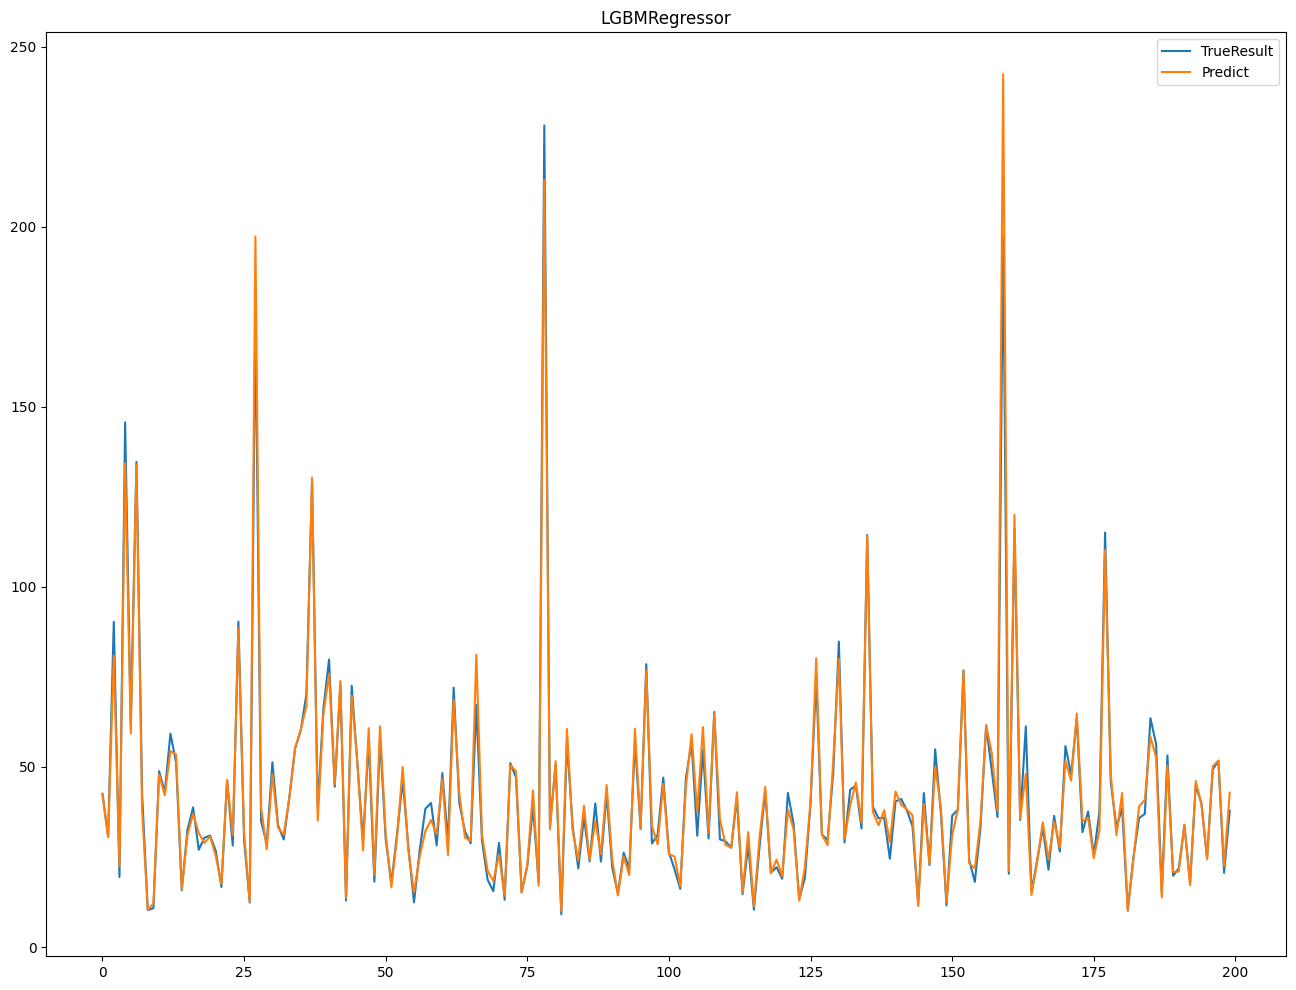

FileNotFoundError: [Errno 2] No such file or directory: 'image/result_model_LGBMRegressor.png'

<Figure size 640x480 with 0 Axes>

In [25]:
# LGBMRegressor
plot_result(lgbm_pred, y_test, low=0, num=200, model='LGBMRegressor')

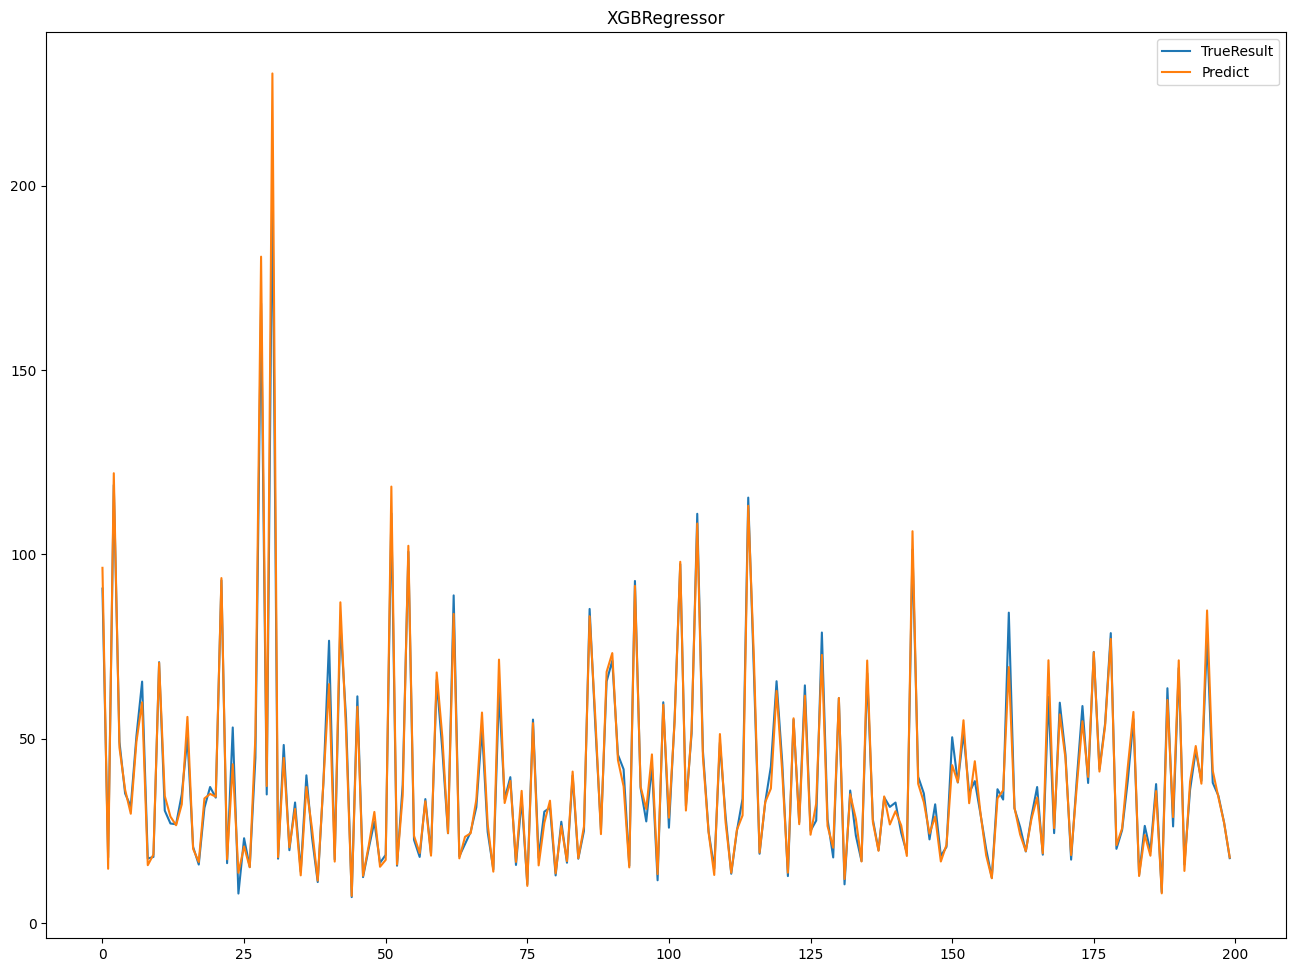

<Figure size 432x288 with 0 Axes>

In [ ]:
# ExtraTreesRegressor
plot_result(xgb_pred, y_test, low=0, num=200, model='XGBRegressor')

In [ ]:
# Fitting Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 123) 
dtr.fit(X_train,y_train)

In [ ]:
# fearure importance of decision tree regressor
feature_importance = dtr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sorted_idx = sorted_idx[-10:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()